# Gathering Data

In [57]:
import pandas as pd
import requests
import os

Importing the Enhanced Twitter Archive

In [58]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

Importing the Image Predictions File

In [59]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [60]:
response.status_code

200

The request is successful

In [61]:
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

Importing the Additional data from the Twitter API

In [62]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install pathlib

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install ruamel-yaml

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


 Query the Twitter API for each tweet in the Twitter archive and save JSON in a text file

In [66]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''


'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n\ntweet_ids = df1.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ":

In [67]:
df3 = pd.read_json('tweet-json.txt', lines = True)

# Assesing Data


In [68]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [69]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [71]:
df1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [72]:
df1[df1.name=="a"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [73]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [74]:
df1.source.duplicated().sum()

2352

In [75]:
df2.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated_wheaten_terrier,0.515919,True,Irish_terrier,0.162655,True,Chesapeake_Bay_retriever,0.125182,True
400,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1,soft-coated_wheaten_terrier,0.340806,True,Sealyham_terrier,0.234898,True,kuvasz,0.203495,True


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [77]:
df2.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [78]:
df3

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [79]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

For the third dataset ( the additional Data from the twitter API ), I will only limit myself to work with three columns : tweet ID, retweet count, and favorite count ) 

In [80]:
df33= df3[["id","retweet_count","favorite_count"]]

In [81]:
df33

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [82]:
df33.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


To find duplicate column names in the three tables

In [83]:
all_columns = pd.Series(list(df1) + list(df2) + list(df33))
all_columns[all_columns.duplicated()]


17    tweet_id
dtype: object

# Quality

The Enhanced Twitter Archive : 
- There are some retweets in the Twitter Archive 
- timestamp column is a string and not a datetime type
- tweet id is an integer not a string 
- Some dogs names are given 'a' as a name when it should be None
- Some rating denominator values are not 10
- Source column is highly duplicated
- Missing values in the columns  in_reply_to_status_id and  in_reply_to_user_id  

Image predictions : 
- Dogs bread names in p1,p2 and p3 columns : lowercase and contains '_'
- tweet_id should be a string not an integer

Additional Data : 
- id should be a string not an integer


# Tidiness

 - The presence of the tweet_id,in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id and  retweeted_status_user_id breaks the tidy rule : each variable forms a column.
 - The presence of 4 breed columns ( dogg, floofer, pupper and puppo ) instead of one column breaks the tidiness rule : Each type of observational unit forms a table
 - retweet_count and favorite_count should be in the first dataset 

# Cleaning

In [84]:
#Making a copy of the three datasets : 
df1_clean = df1.copy()
df2_clean = df2.copy()
df33_clean = df33.copy()

There are some retweets in the Twitter Archive

#### Define

Make a list of the index rows where the retweeted status id is not null and then drop those rows

#### Code

In [85]:
retweet_id_list = list(df1_clean[df1_clean['retweeted_status_id'].isnull() == False] .index ) 

In [86]:
for i in retweet_id_list : 
    df1_clean.drop( 
    axis=0, 
    index=i, 
    inplace=True, 
)

#### Test 

In [87]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

The presence of 4 breed columns ( dogg, floofer, pupper and puppo ) instead of one column breaks the tidiness rule : Each type of observational unit forms a table

#####  Define
Make a new column 'stage' and merge the correspondant values from the doggo,floofer,pupper and puppo columns

##### Code

In [88]:
df1_clean['stage'] = df1_clean['doggo'] + ', ' + df1_clean['floofer'] + ',' + df1_clean['pupper'] + ',' + df1_clean['puppo'] .astype(str)


In [89]:
df1_clean["stage"] = df1_clean["stage"].apply(lambda x: x.replace("None",""))
df1_clean["stage"] = df1_clean["stage"].apply(lambda x: x.replace(",",""))

        
    

In [90]:
df1_clean.stage.value_counts()

                 1831
 pupper           224
doggo              75
 puppo             24
doggo pupper       10
 floofer            9
doggo puppo         1
doggo floofer       1
Name: stage, dtype: int64

In [91]:
df1_clean["stage"] = df1_clean["stage"].apply(lambda x: x.replace("doggo pupper","doggo,pupper"))

In [92]:
df1_clean["stage"] = df1_clean["stage"].apply(lambda x: x.replace("doggo puppo","doggo,puppo"))

In [93]:
df1_clean["stage"] = df1_clean["stage"].apply(lambda x: x.replace("doggo floofer","doggo,floofer"))

In [94]:
#Dropping doggo, floofer, pupper and puppo columns
df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

##### Test 


In [95]:
df1_clean.stage.value_counts()

                 1831
 pupper           224
doggo              75
 puppo             24
doggo,pupper       10
 floofer            9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

id should be a string not an integer

##### Define


Change id on the third dataset to a string 

##### Code

In [96]:
df33_clean.id = df33_clean.id.astype('str')


##### Test

In [97]:
df33_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


tweet_id should be a string 

##### Define

Change tweet_id on the first dataset to a string 

##### Code 

In [98]:
df1_clean.tweet_id = df1_clean.tweet_id.astype('str')


##### Test

In [99]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  stage                       2175 

retweet_count and favorite_count should be in the first dataset

##### Define 

Merge the retweet_count and the favorite_count to the Enhanced Twitter Archive table. We need to change the id column name to the same twwet_id name in the first dataset to be able to merge it.

##### Code

In [100]:
df33_clean.rename(columns={'id':'tweet_id'},inplace =True)


In [101]:
df1_clean = pd.merge(df1_clean, df33_clean,
                            on=['tweet_id'], how='left')

#### Test

In [102]:
df1_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
495,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,2042,8472
1544,680100725817409536,NaN,NaN,2015-12-24 19:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This pupper is not coming inside until she cat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680100725...,11,10,None,pupper,1554,3891
1748,674051556661161984,NaN,NaN,2015-12-08 02:23:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She knits. Specializes in tobogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674051556...,10,10,Lucy,,530,1564


timestamp column is a string and not a datetime type

#### Define

Change timestamp column to datetime

#####  Code

In [103]:
df1_clean.timestamp=pd.to_datetime(df1_clean.timestamp)

##### Test

In [104]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

Some dogs names are given 'a' as a name when it should be None

##### Define

Find the index of the rows where the dog's name is 'a' and change it to None

#### Code

In [105]:
df1_clean['name'].mask(df1_clean['name'] =='a' ,None, inplace=True)

#####  Test

In [106]:
df1_clean[df1_clean.name== 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count


No more dogs with the name a.

Some rating denominator values are not 10

##### Define 

Change all the denominator values that are different from 10 to 10

##### Code

In [107]:
df1_clean['rating_denominator'].mask(df1_clean['rating_denominator'] !='10' ,10, inplace=True)

##### Test

In [108]:
df1_clean['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

Source column is highly duplicated and too many missing values in the columns in_reply_to_status_id and in_reply_to_user_id

#### Define

Drop the source, in_reply_to_status_id and in_reply_to_user_id columns

##### Code

In [109]:
df1_clean = df1_clean.drop(columns=['source', 'in_reply_to_status_id','in_reply_to_user_id'])


##### Test 

In [110]:
list(df1_clean)

['tweet_id',
 'timestamp',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'retweet_count',
 'favorite_count']

Dogs bread names in p1,p2 and p3 columns : lowercase and contains '_'

##### Define 

Capitalize the first letter in the three columns and replace the '_' with a space

##### Code

In [111]:
df2_clean['p1'] = df2_clean['p1'] .str.title()
df2_clean['p2'] = df2_clean['p2'] .str.title()
df2_clean['p3'] = df2_clean['p3'] .str.title()


In [112]:
df2_clean[['p1','p2','p3']] = df2_clean[['p1','p2','p3']].replace('_', ' ', regex=True)


##### Test

In [113]:
df2_clean.p1.value_counts()

Golden Retriever      150
Labrador Retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Pillow                  1
Carousel                1
Bald Eagle              1
Lorikeet                1
Orange                  1
Name: p1, Length: 378, dtype: int64

In [114]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Storing Data

In [115]:
df1_clean.to_csv('twitter_archive_master.csv')

In [116]:
df2_clean.to_csv('image_predictions.csv')

### Check 

In [117]:
df1 = pd.read_csv('twitter_archive_master.csv')

In [118]:
df1.head(2)

,Unnamed: 0,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467
1,1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6514,33819


In [119]:
df2= pd.read_csv('image_predictions.csv')

In [120]:
df2.sample(2)

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
398,398,673680198160809984,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,Samoyed,0.989853,True,Arctic Fox,0.003344,False,Chow,0.002802,True
472,472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,Labrador Retriever,0.458746,True,Great Dane,0.235504,True,Staffordshire Bullterrier,0.116864,True


# Analyzing and Visualising Data

Using the two cleaned datasets , the Twitter Archive and the Image predictions I will answer the following questions : 
- What dog breeds are the easiest to predict ? 
- What dogs' stage is the most liked ? 
- What are the days with the highest users' engagement ?

#### Question 1 : What dog breeds are the easiest to predict ? 

Let's only consider the tweets with a p1_conf higher than 0.85 

In [121]:
df2_pred = df2.query('p1_conf>0.85')

In [122]:
df2_pred.shape

(509, 13)

The used algorithm were able to easily predict the dog breed, from the first trial. Let's display the breeds names in this sub set.

In [123]:
df2_pred.p1.value_counts()

Golden Retriever      58
Pembroke              31
Labrador Retriever    31
Pug                   30
Samoyed               23
                      ..
Collie                 1
Wombat                 1
Microwave              1
Terrapin               1
Envelope               1
Name: p1, Length: 153, dtype: int64

A priori, Golden Retriever is the easiet breed to recognize. Pembroke, Labrador Retriever and Pug are also not very hard to recognize.

#### Question 2 : What dogs' stage is the most liked ? 

In [124]:
df1.groupby(['stage']).size()

stage
                 1831
 floofer            9
 pupper           224
 puppo             24
doggo              75
doggo,floofer       1
doggo,pupper       10
doggo,puppo         1
dtype: int64

We will ignore the doggo,floofer and the doggo,puppo stage since there are only one value in each stage.

Let's create 5 dataframes with the correspondant dog stage and compare their retweets and favorite.

In [125]:
df1floofer = df1[df1.stage==' floofer']

In [126]:
df1pupper =df1[df1.stage==' pupper']

In [127]:
df1puppo =df1[df1.stage==' puppo']

In [128]:
df1doggo =df1[df1.stage=='doggo ']

In [129]:
df1doggopupper =df1[df1.stage=='doggo,pupper']

Now let's check for the mean value of the retweet counts to see which dog stage has the highest retweet counts.

In [130]:
df1floofer.retweet_count.mean(),df1pupper.retweet_count.mean(),df1puppo.retweet_count.mean(),df1doggo.retweet_count.mean(),df1doggopupper.retweet_count.mean()

(4155.888888888889, 2457.723214285714, 6332.5, 6348.786666666667, 3971.2)

The doggo stage seems to be the most liked among these dogs since it has the highest retweets rate, then comes the puppo stage, the floofer stage comes third, the doggo,pupper stages fourth and lastly the pupper stage is the least retweeted.

#### Question 3 : What are  the days with the highest users' engagement ?

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 20)

Let's extract the days names from the timestamp column

Reconverting timestamp to datetime

In [133]:
df1['timestamp']= pd.to_datetime(df1['timestamp'], format='%Y-%m-%d')

In [134]:
df1['dayname']=df1['timestamp'].dt.day_name()

Let's look through the retweet_count column

In [135]:
df1.retweet_count.describe()

count     2175.000000
mean      2757.987126
std       4646.599662
min          0.000000
25%        608.000000
50%       1341.000000
75%       3220.000000
max      79515.000000
Name: retweet_count, dtype: float64

Let's only consider the rows where the retweets were higher than the average retweet count

In [136]:
morethanaverage = df1.query('retweet_count>1473')

In [137]:
morethanaverage.shape

(1027, 15)

<AxesSubplot:xlabel='dayname', ylabel='retweet_count'>

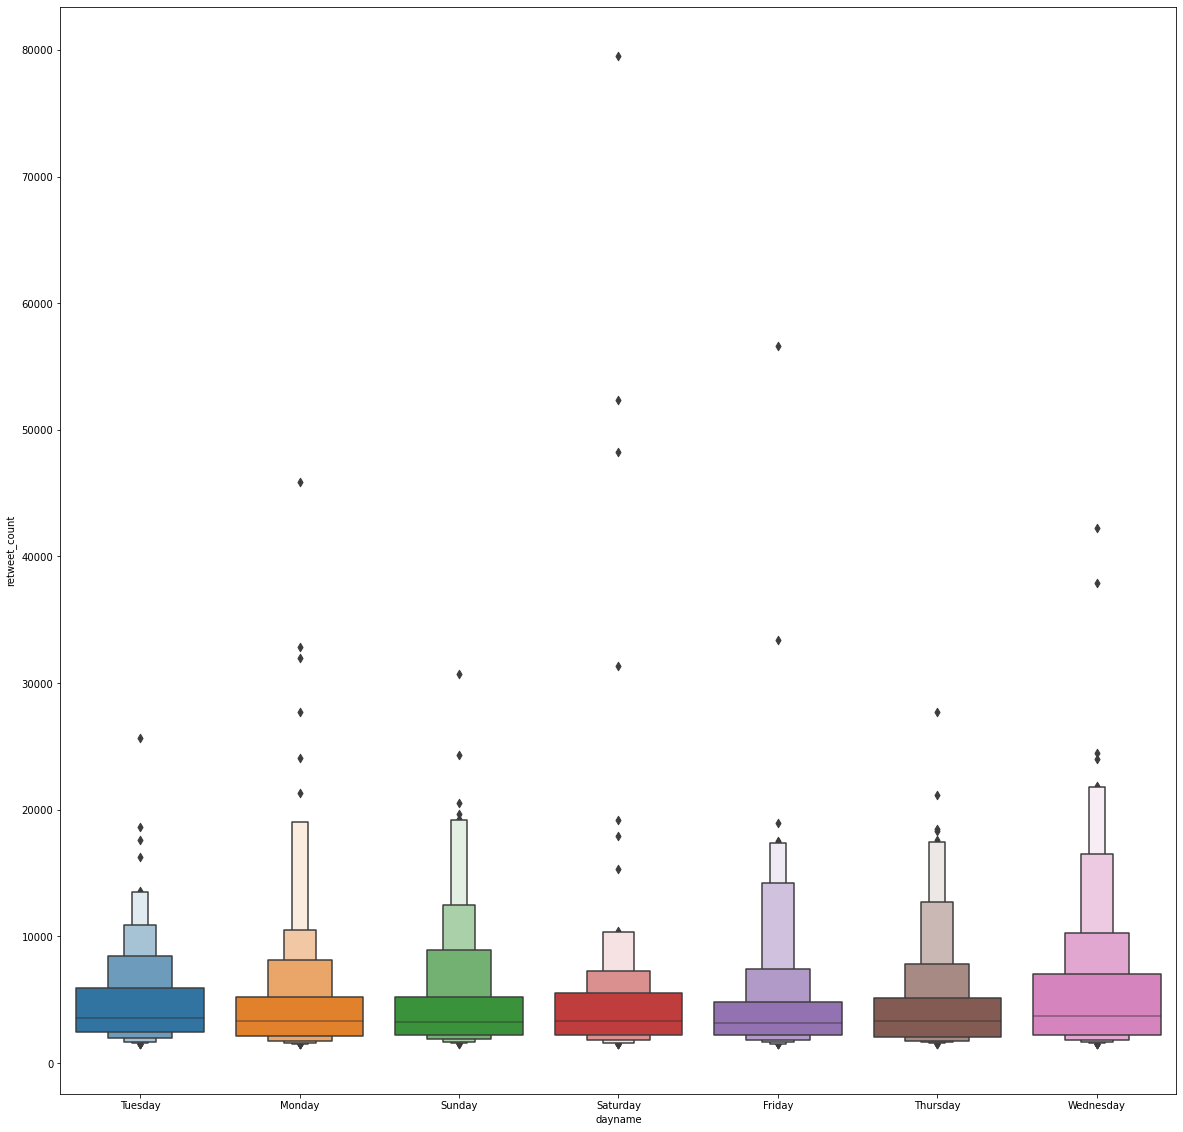

In [138]:
sns.boxenplot(data=morethanaverage, x="dayname", y="retweet_count")


Wednesday and Monday seems to be the days where people engaged more with the dogs pictures by retweeting them.

# Conclusion 

After gathering the data from various sources, assessing and cleaning it and regathering it into two dataframes, it was possible to conduct an analysis and extract some interesting insights.
Certain dogs are more easy to recognize : Golden Retriever is the easiet breed to recognize. Pembroke, Labrador Retriever and Pug are also not very hard to recognize. 
Doggo stages can influence the ratings. The doggo stage is the most liked among these dogs since it has the highest retweets rate.
The timing is also important as we can see that Wednesday counts the highest retweets.
This cleaning and analysis, have some limits. The original dataset has more than 8 quality issues and more than 2 tidiness issues. We fixed just 10 issues, according to the project requirements.
During the Analysis, we didn't take into consideration many aspects.

### Resources :

- https://pandas.pydata.org
- https://seaborn.pydata.org/
- https://stackoverflow.com/
- https://realpython.com/
- https://www.analyticsvidhya.com/
- https://www.projectpro.io
